<a href="https://colab.research.google.com/github/gnishitha2004-source/AI-ML-Internship-Task6/blob/main/KNN_Classification_Task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target classes: ['setosa' 'versicolor' 'virginica']


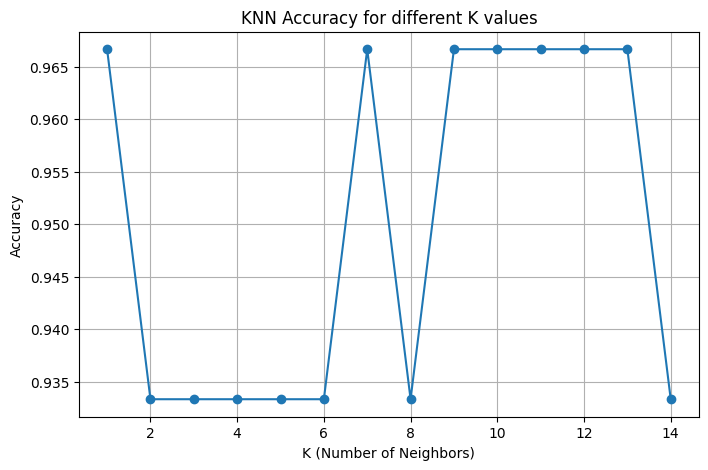

Best K = 1 with accuracy = 0.97

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



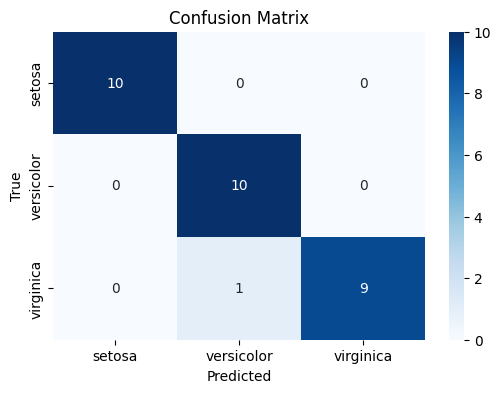

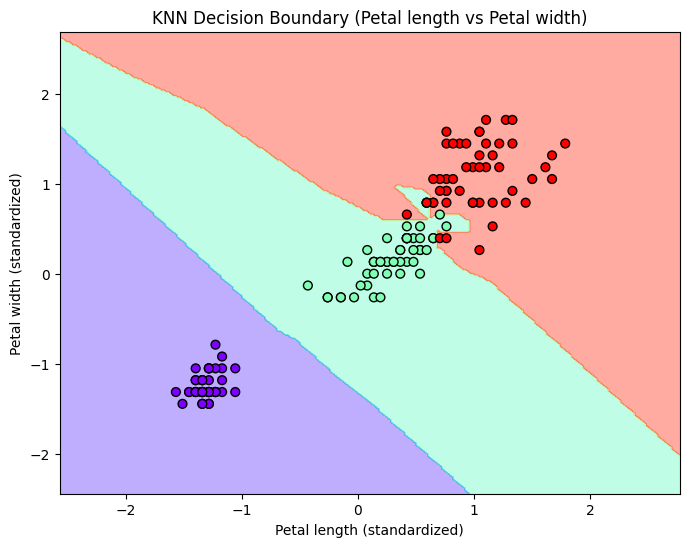

In [1]:
# Task 6: K-Nearest Neighbors (KNN) Classification
# Author: Your Name
# Internship Task

# ==============================
# Step 1: Import Libraries
# ==============================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ==============================
# Step 2: Load Dataset (Iris)
# ==============================
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

print("First 5 rows of dataset:")
print(X.head())
print("\nTarget classes:", iris.target_names)

# ==============================
# Step 3: Normalize Features
# ==============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ==============================
# Step 4: Train-Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# ==============================
# Step 5: Experiment with Different K values
# ==============================
accuracy_scores = []
k_values = range(1, 15)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot accuracy vs K
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("KNN Accuracy for different K values")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# ==============================
# Step 6: Best K & Final Model
# ==============================
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K = {best_k} with accuracy = {max(accuracy_scores):.2f}")

final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_pred_final = final_knn.predict(X_test)

# ==============================
# Step 7: Evaluation
# ==============================
print("\nClassification Report:\n", classification_report(y_test, y_pred_final, target_names=iris.target_names))

cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ==============================
# Step 8: Decision Boundary (2 Features)
# ==============================
# For visualization, take only 2 features: Petal length & Petal width
X_vis = X_scaled[:, 2:4]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42, stratify=y
)

knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# Meshgrid for decision boundary
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.rainbow)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', s=40, cmap=plt.cm.rainbow)
plt.title("KNN Decision Boundary (Petal length vs Petal width)")
plt.xlabel("Petal length (standardized)")
plt.ylabel("Petal width (standardized)")
plt.show()